# End to End Heart Disease Classification using ML

**This notebook looks into various python-based ML and data science libraries in an attempt to build a machine learning model capable of predicting whether a patient has heart disease or not based on their medical attributes**

## 1. Problem Definition

>Given clinical parameters , can we predict whether a patient has heart disease or not?


## 2. Data 

Data came from UCI Machine Learning Repository 
Kaggle Link : https://www.kaggle.com/datasets/thisishusseinali/uci-heart-disease-data


## 3. Evaluation

>If we can reach 95% accuracy at predicting whether a patient has heart disease or not during proof of concept , we'll pursue this project


## 4. Features

**Data Dictionary**

* age (Age of the patient in years)
* sex (Male/Female)
* cp chest pain type
 > 0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease

* trestbps resting blood pressure 
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg resting electrocardiographic results 
* thalach maximum heart rate achieved
* exang exercise-induced angina (True/ False)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by fluoroscopy
* thal 
* target the predicted attribute (1= yes, 0= no)

## Preparing the tools :

In [86]:
#Import all tools to be used

#Regular EDA and Plotting Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Load Data

In [87]:
df= pd.read_csv("/kaggle/input/heart-disease-ucl/heart_disease_data.csv")
df.shape 

(303, 14)

## Data Exploration ( EDA )

Goal is to find more details about the data

In [88]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [90]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

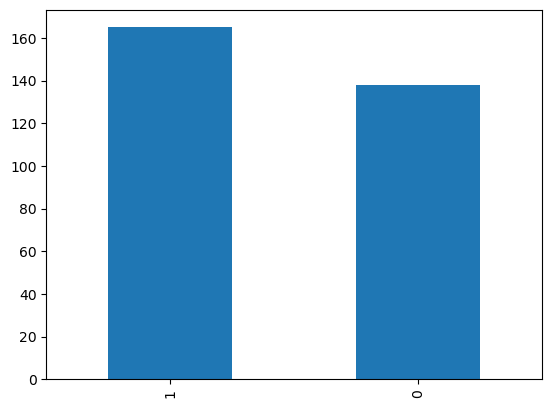

In [91]:
df["target"].value_counts().plot(kind="bar")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [93]:
#Checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [94]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [95]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

1=Male
0=Female

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

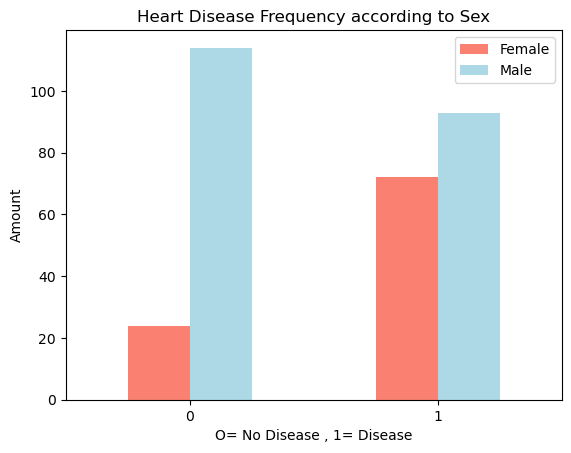

In [96]:
#Compare target with sex column

pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"])

plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("O= No Disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [97]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

Text(0, 0.5, 'Max HR')

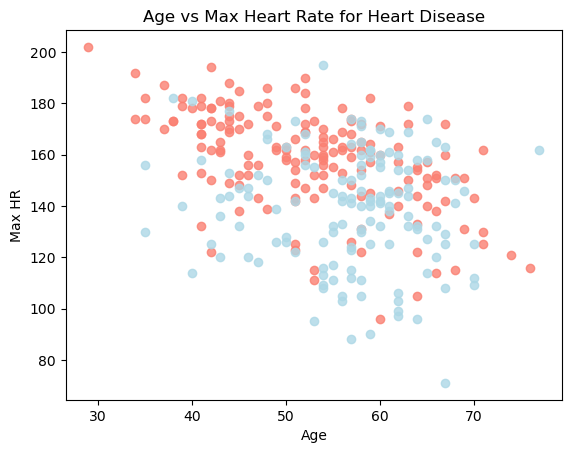

In [98]:
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon",alpha=0.8)

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue",alpha=0.8)

plt.title("Age vs Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max HR")


<Axes: ylabel='Frequency'>

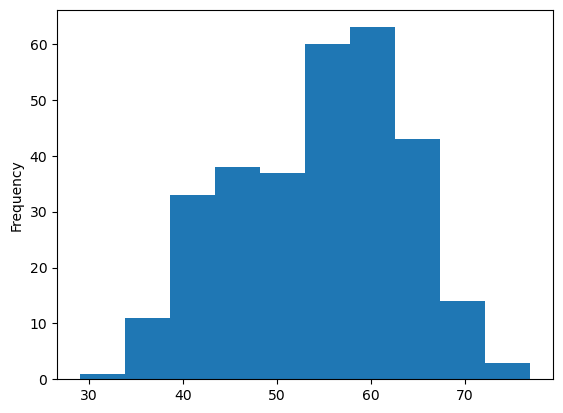

In [99]:
#Check disturbution of Age Column
df.age.plot.hist()

## Heart Disease Frequency per Chest Pain Type

cp  chest pain type

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. ymptomatic: chest pain not showing signs of disease

In [100]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

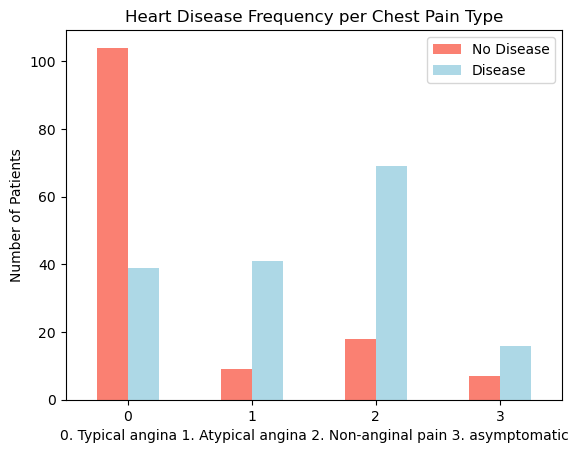

In [101]:
pd.crosstab(df.cp,df.target).plot.bar(color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0. Typical angina 1. Atypical angina 2. Non-anginal pain 3. asymptomatic")
plt.ylabel("Number of Patients")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

## Correlation Matrix

In [102]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


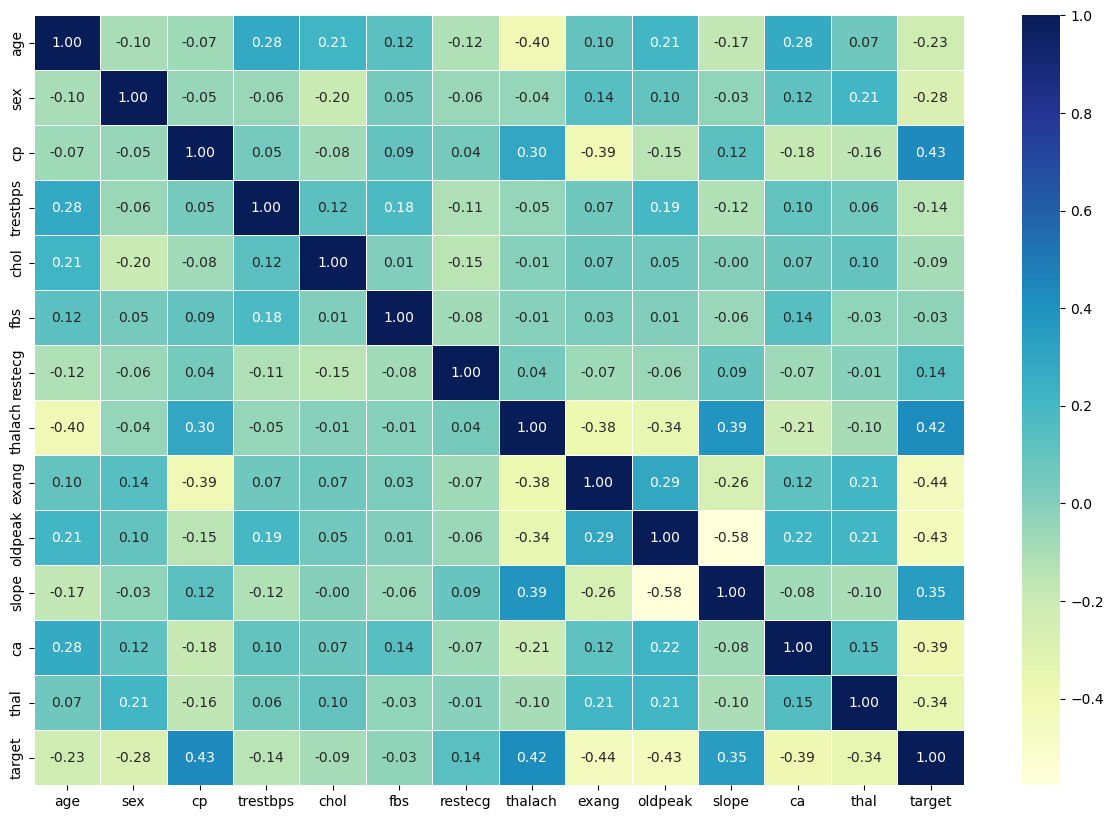

In [103]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize= (15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt= ".2f",
               cmap="YlGnBu")

# 5. Modelling

In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [105]:
#Split into X and y

X= df.drop("target", axis=1)
y= df["target"]

In [106]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [107]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [108]:
#Split into random training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


In [109]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [110]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

**We are going to try 3 different machine learning models**

1. Logistic Regression
2. K-nearest Neighbouurs Classifier
3. Random Forest Classifier


In [111]:
#Putting models in a dictionary
models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Creating function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Evaluates given ML model
    """
    np.random.seed(42)
    model_scores = {}
    
    #Loop through models
    for name,model in models.items():
        #Fit model to data
        model.fit(X_train,y_train)
        #Evaluate score in model_score
        model_scores[name]= model.score(X_test,y_test)
        
    return model_scores

In [112]:
model_scores= fit_and_score(models=models
                            ,X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

<Axes: >

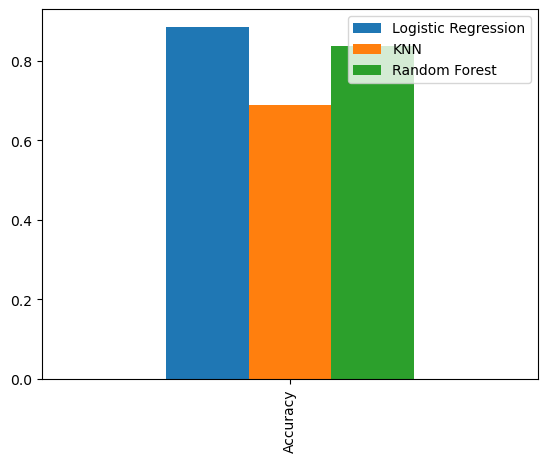

In [113]:
model_compare= pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.plot.bar()

Let's look at following:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under Curve ( AUC )

In [116]:
#Tuning KNN

train_scores= []
test_scores= []

#Create a list of values for n_neighbours

neighbors= range(1,21)
knn= KNeighborsClassifier()

#Loop through neighbours

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [117]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN Score on test data : 75.41%


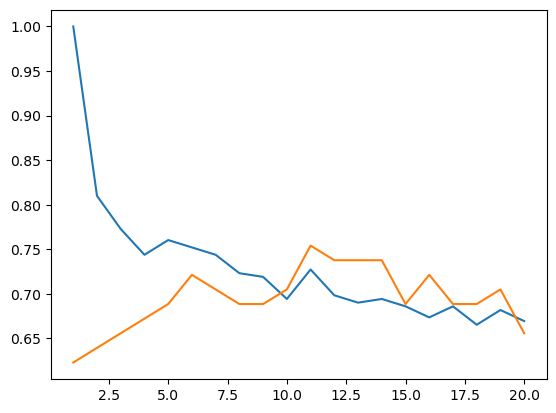

In [118]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
print(f"Maximum KNN Score on test data : {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

Tuning :
* LogisticRegression()
* RandomForestClassifier

### 1. Logistic Regression

In [119]:
#Create hyperparameter grid
log_reg_grid= {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}


rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)}

In [120]:
np.random.seed(42)

rs_log_reg= RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [121]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [122]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### 2. RandomForestClassifier

In [123]:
np.random.seed(42)

rs_rf= RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [124]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [125]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### GridSearchCV for Logistic Regression

In [126]:
log_reg_grid= {"C": np.logspace(-4,4,40),
               "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=7,
                        verbose= True)

gs_log_reg.fit(X_train,y_train)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [127]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating model

* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC Curve
* Area under Curve ( AUC )

In [128]:
y_preds= gs_log_reg.predict(X_test)

In [129]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [130]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

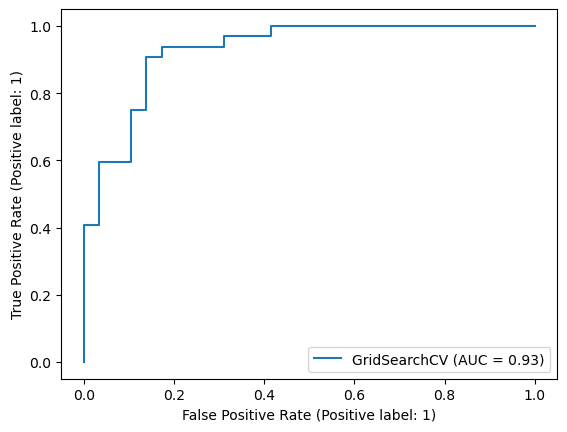

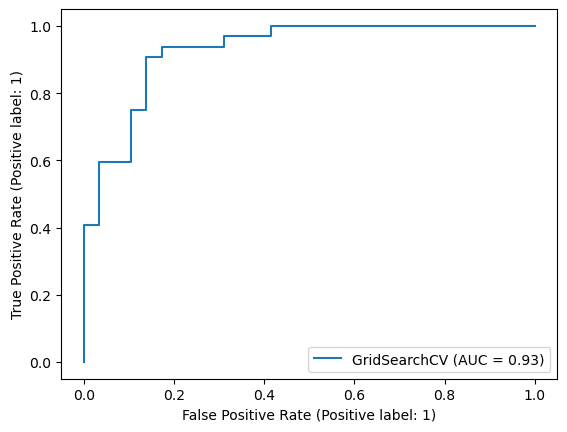

In [148]:
disp=RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
disp.plot()

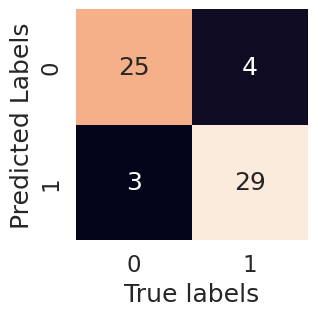

In [150]:
#Confusion Matrix
sns.set(font_scale=1.5)

def conf_mat(y_test,y_preds):
    
    fig,ax= plt.subplots(figsize=(3,3))
    
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    
    plt.xlabel("True labels")
    plt.ylabel("Predicted Labels")
    
conf_mat(y_test,y_preds)

In [151]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation

In [152]:
gs_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [159]:
clf=LogisticRegression(C=0.19144819761699575,solver="liblinear")

In [162]:
#Cross val accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [163]:
#Cross Val Precision
cv_pre= cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [166]:
cv_rec=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9212121212121213

In [165]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1


0.8673007976269721

<Axes: title={'center': 'Cross Validation Metrics'}>

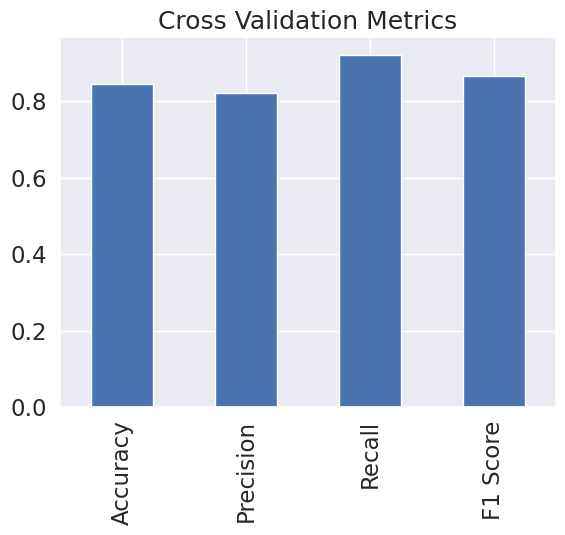

In [173]:
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1 Score":cv_f1},
                        index=[1])

cv_metrics.T.plot.bar(title="Cross Validation Metrics",legend=False)

## Feature Importance

In [174]:
gs_log_reg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [175]:
clf=LogisticRegression(C=0.19144819761699575,solver= "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.19144819761699575, solver='liblinear')

In [176]:
#Check coef_
clf.coef_

array([[ 0.0028952 , -0.83734909,  0.65352833, -0.01156789, -0.00164212,
         0.04176192,  0.30423711,  0.02451662, -0.58988443, -0.56503174,
         0.44063325, -0.62947459, -0.66754623]])

In [178]:
#Match features with columns

feat_dic= dict(zip(df.columns,list(clf.coef_[0])))

feat_dic

{'age': 0.0028951950788180417,
 'sex': -0.8373490944308251,
 'cp': 0.6535283304030118,
 'trestbps': -0.011567891979562563,
 'chol': -0.0016421247255432826,
 'fbs': 0.04176191862455108,
 'restecg': 0.3042371113132385,
 'thalach': 0.024516615073590976,
 'exang': -0.5898844335476068,
 'oldpeak': -0.5650317373354325,
 'slope': 0.44063325037578754,
 'ca': -0.6294745892883773,
 'thal': -0.6675462322520836}

<Axes: title={'center': 'Feature Importance'}>

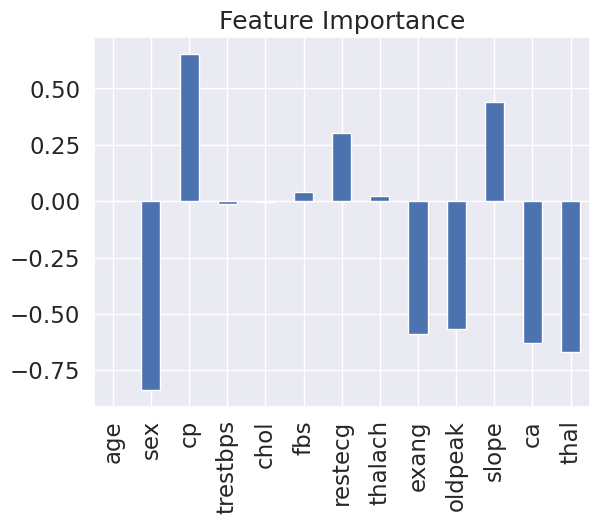

In [179]:
feature_plot= pd.DataFrame(feat_dic,index=[0])
feature_plot.T.plot.bar(title="Feature Importance",legend=False)

**Most imp Features are : CP, RestECG, Slope**

Better Models: CatBoost and XGBoost